In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
def f1(v):
    return 0.28 * (v + 27.) / (torch.exp((v + 27.) / 5.) - 1)

def f2(v, a1, a2, a3):
    return a1 * torch.exp(-(v + a2) / a3)

In [3]:
x = torch.linspace(-100, 100, 1000)
y1 = f1(x)
y2 = f2(x, 4., 60., 18.)

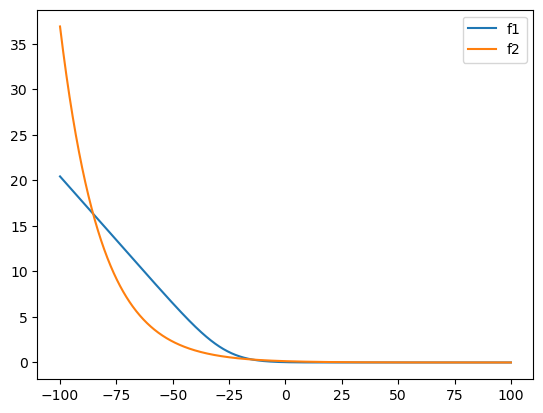

In [4]:
f, ax = plt.subplots()

ax.plot(x, y1, label='f1')
ax.plot(x, y2, label='f2')
ax.legend()
plt.show()

loss=0.6159353852272034


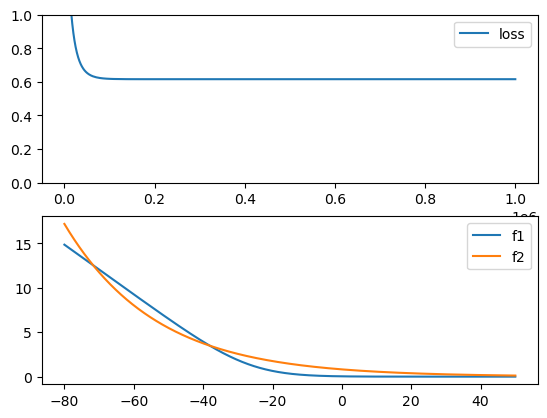

In [5]:
A1 = torch.tensor(4., requires_grad=True)
A2 = torch.tensor(60., requires_grad=True)
A3 = torch.tensor(18., requires_grad=True)

x = torch.linspace(-80, 50, 2000)
y1 = f1(x)
iters = 1000000
losses = []
optimizer = torch.optim.SGD([A1, A2, A3], lr=0.001)

for i in range(iters):
    y2 = f2(x, A1, A2, A3)
    loss = torch.mean((y1 - y2) ** 2)
    losses.append(loss.item())
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
print(f"loss={loss.item()}")

f, ax = plt.subplots(2)
ax[0].plot(torch.arange(0, iters, 1), losses, label="loss")
ax[0].set_ylim(0., 1.)
ax[0].legend()
ax[1].plot(x, y1, label='f1')
ax[1].plot(x, y2.detach().numpy(), label='f2')
ax[1].legend()
plt.show()

In [6]:
print(f"A1={A1}, A2={A2}, A3={A3}")

A1=7.698166847229004, A2=58.9292106628418, A3=26.259855270385742
